#  Choosing the best place to set up  a restaurant in London

### Francisco Guerrero , Bsc Mechatronic Engineering ,Universidad Nacional de Piura

## This project is focused on finding the best borough in London  to put a restaurant, the porject is developed under the above constraints

### Crime  per borough
### Restaurants per borough
### Population per borough

## The data was obtained trough several databases like London Crime Data 2008-2016 (From Kaggle) and Number of public houses, licenced clubs, restaurants and takeaways by Borough (ONS ) both of them are verified sources , the population was scraped from Wikipedia .


### The code is written in python , and uses libraries like :

#### Pandas :For manipulating Dataframes
#### BeautifulSoup: For scraping data from pages
#### Matplotlib: For visualizing data , plot time series
#### Numpy: For mathematical operations with arrays
#### Folium : For plotting maps
#### json: To access and manipulate Java Script Objects (Sort of dictionaries)


# Beginning

# Initial setup

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup

# Read Databases (Crime, Restaurants)

In [2]:
Crime=pd.read_csv('Lcrime.csv')


In [3]:
Lres=pd.read_excel('Lres.xls',sheetname='Restaurants units')
Ures=pd.read_excel('Ures.xls',sheetname='Unlicensed Restaurants units')
Pres=pd.read_excel('Pres.xls',sheetname='Pubs units')
Tres=pd.read_excel('Tres.xls',sheetname='Takeaway and food stand units')

### Where Crime is the number of crimes reported by LSOA between (2008-2016) and LRes,Ures,Pres,Tres are
### the number of licensed restaurant , unlicensed restaurant, Pubs , Take away shops in that order.

Let's take a look to Crime csv

In [4]:
Crime.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [5]:
print(Crime.shape)

(13490604, 7)


As is evident Crime consists of 13 million rows and 7 columns, altough it seems big , we'll only need the numbers of crimes per Borough

The 1st step will remove the rows with value 0 (according to kaggle website , 0 means 0 reported incidents in specific LSOA, so no crimes ocurred), 

In [5]:
Crime = Crime.drop(Crime[Crime.value==0].index)
Crime=Crime.reset_index()
Crime=Crime.drop('index',axis=1)
Crime.tail()

lsoa_code     borough               major_category  \
3419094  E01000789     Bromley  Violence Against the Person   
3419095  E01003301    Lewisham  Violence Against the Person   
3419096  E01001679   Greenwich           Theft and Handling   
3419097  E01033327    Lewisham  Violence Against the Person   
3419098  E01002504  Hillingdon                      Robbery   

                        minor_category  value  year  month  
3419094                     Harassment      3  2009     12  
3419095            Assault with Injury      1  2015     10  
3419096  Theft/Taking Of Motor Vehicle      1  2012      4  
3419097                 Common Assault      2  2013      7  
3419098              Personal Property      1  2015      6

In [6]:
print(Crime.shape)

(3419099, 7)


The numbers of rows has reduced from 13490604 to 3419099 more than ten millions rows

Now we need to find the number of crimes , first for years

In [7]:
year=pd.pivot_table(data=Crime, index='borough', values='value',columns='year', aggfunc='sum')
year

year                       2008     2009     2010     2011     2012     2013  \
borough                                                                        
Barking and Dagenham    17656.0  17713.0  17130.0  16686.0  15990.0  15759.0   
Barnet                  23944.0  23449.0  23416.0  24007.0  23573.0  22510.0   
Bexley                  15305.0  14445.0  13166.0  11325.0  11669.0  11552.0   
Brent                   23504.0  24748.0  25512.0  27669.0  26357.0  23759.0   
Bromley                 24015.0  21858.0  19572.0  19868.0  19622.0  18945.0   
Camden                  32010.0  31612.0  31804.0  33956.0  31472.0  28435.0   
City of London              NaN      NaN      NaN     69.0    157.0    110.0   
Croydon                 29516.0  29784.0  29373.0  29830.0  30189.0  27444.0   
Ealing                  28947.0  28617.0  31360.0  29537.0  28832.0  25917.0   
Enfield                 21980.0  21147.0  20808.0  21041.0  21069.0  21574.0   
Greenwich               22010.0  19851.0  18626.0  18552.0  20028.0  18948.0   
Hackney                 22004.0  20718.0  20175.0  21395.0  27095.0  25633.0   
Hammersmith and Fulham  21114.0  21211.0  21941.0  22151.0  21030.0  18605.0   
Haringey                25724.0  23704.0  22156.0  23179.0  23231.0  20705.0   
Harrow                  13774.0  13948.0  13945.0  12801.0  12803.0  11914.0   
Havering                15395.0  14538.0  14957.0  15496.0  15965.0  15089.0   
Hillingdon              24318.0  24605.0  23421.0  24282.0  22103.0  20248.0   
Hounslow                20204.0  19783.0  19665.0  21105.0  22724.0  19749.0   
Islington               26273.0  25485.0  24693.0  24980.0  26268.0  23784.0   
Kensington and Chelsea  20663.0  18742.0  19481.0  19146.0  19757.0  17702.0   
Kingston upon Thames    10661.0  10163.0  10171.0  10155.0   9956.0   9191.0   
Lambeth                 31717.0  31225.0  31671.0  33224.0  33473.0  31868.0   
Lewisham                27054.0  25182.0  24532.0  24201.0  23652.0  22074.0   
Merton                  13875.0  13561.0  13595.0  13548.0  12856.0  11595.0   
Newham                  29752.0  28610.0  30728.0  27978.0  30067.0  27577.0   
Redbridge               20873.0  20837.0  20652.0  21994.0  21424.0  19793.0   
Richmond upon Thames    11106.0  10618.0  10601.0  10896.0  11168.0  10439.0   
Southwark               33470.0  30623.0  31320.0  30723.0  30737.0  31128.0   
Sutton                  12943.0  12240.0  12032.0  11068.0  10948.0  10057.0   
Tower Hamlets           23578.0  21959.0  23072.0  24712.0  26784.0  26258.0   
Waltham Forest          24080.0  24761.0  24818.0  23714.0  22647.0  21903.0   
Wandsworth              23330.0  23021.0  22815.0  21384.0  24457.0  22290.0   
Westminster             47846.0  48456.0  48116.0  54243.0  59226.0  53852.0   

year                       2014     2015     2016  
borough                                            
Barking and Dagenham    15426.0  16346.0  16741.0  
Barnet                  22572.0  24036.0  24684.0  
Bexley                  11844.0  11990.0  12840.0  
Brent                   24426.0  24883.0  26693.0  
Bromley                 19668.0  20637.0  20164.0  
Camden                  27198.0  29477.0  29183.0  
City of London            115.0    151.0    178.0  
Croydon                 27357.0  28089.0  28712.0  
Ealing                  24978.0  26247.0  27127.0  
Enfield                 21700.0  22076.0  22485.0  
Greenwich               19894.0  20929.0  22730.0  
Hackney                 24893.0  26941.0  28265.0  
Hammersmith and Fulham  19185.0  19848.0  20174.0  
Haringey                22773.0  24626.0  27174.0  
Harrow                  11909.0  12601.0  13153.0  
Havering                14734.0  15870.0  16903.0  
Hillingdon              23128.0  23234.0  24341.0  
Hounslow                20005.0  21286.0  22251.0  
Islington               24679.0  27032.0  27092.0  
Kensington and Chelsea  17840.0  19070.0  19580.0  
Kingston upon Thames     9288.0   9738.0   9983.0  
Lam

This pivot tables enumerates the number of crimes per year per borough,in the next lines we'll show the number of total crimes per Borough

In [8]:
Crime_sum=Crime[['borough','value']].groupby('borough').sum()
Crime_sum=pd.DataFrame({'borough':Crime_sum.index,'count':list(Crime_sum.values)})
Crime_sum['count'] = Crime_sum['count'].str.get(0)
Crime_sum.head()

borough   count
0  Barking and Dagenham  149447
1                Barnet  212191
2                Bexley  114136
3                 Brent  227551
4               Bromley  184349

However this list counts all the crime ('But for a better results we'll find the mean value in the 9 years, altough for london we need to do additional steps because no data was collected until 2011)

In [9]:
Crime_sum['count']=pd.Series(np.array(list(Crime_sum['count']))//9)

In [10]:
Crime_sum

borough  count
0     Barking and Dagenham  16605
1                   Barnet  23576
2                   Bexley  12681
3                    Brent  25283
4                  Bromley  20483
5                   Camden  30571
6           City of London     86
7                  Croydon  28921
8                   Ealing  27951
9                  Enfield  21542
10               Greenwich  20174
11                 Hackney  24124
12  Hammersmith and Fulham  20584
13                Haringey  23696
14                  Harrow  12983
15                Havering  15438
16              Hillingdon  23297
17                Hounslow  20752
18               Islington  25587
19  Kensington and Chelsea  19109
20    Kingston upon Thames   9922
21                 Lambeth  32464
22                Lewisham  23904
23                  Merton  12850
24                  Newham  29113
25               Redbridge  20395
26    Richmond upon Thames  10752
27               Southwark  30978
28                  Sutton  11220
29           Tower Hamlets  25401
30          Waltham Forest  22653
31              Wandsworth  22749
32             Westminster  50558

In [11]:
Crime_sum.at[6, 'count'] = Crime_sum.at[6, 'count']*9//6

In [12]:
Crime_sum.loc[6,'count']

129

Lets take a look of London with mean crime value

Initial Setup

In [13]:
world_geo = r'lbarrios.geojson' # geojson file
latitude = 51.55
longitude = 0.0922

# create a plain world map
WM = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

Plotting map


In [14]:
folium.Choropleth(
    geo_data=world_geo,
    data=Crime_sum,
    columns=['borough','count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name=' Avg Crime in London'
).add_to(WM)

WM

This maps seems to be fine however it's not considering the population per borough in London,so we need to find the Crime density per volume of population, for this we will scrap the data from wikipedia

In [15]:
Url = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text

In [16]:
soup = BeautifulSoup(Url,'lxml')

In [17]:
PC=[]
BR=[]
NB=[]
i=1
for element in soup.table.find_all('td'):
    if i == 1:
        PC.append(element.text)
    if i == 8:
        BR.append(element.text)
    if i == 9: 
        NB.append(element.text)
   
    i = i+1
    if i==11:
        i=1


In [18]:
df = pd.DataFrame(columns=['Borough','Pop','Coordinates'])
df['Borough'] = PC
df['Pop'] = BR
df['Coordinates'] = NB

df['Borough'] = df['Borough'].str.strip()
df['Pop'] = df['Pop'].str.strip()
df['Coordinates'] = df['Coordinates'].str.strip()
df.loc[32]=['City of London','7000','51.5155°N 0.0922°W ']

In [19]:
df.head()

Borough      Pop  \
0  Barking and Dagenham [note 1]  194,352   
1                         Barnet  369,088   
2                         Bexley  236,687   
3                          Brent  317,264   
4                        Bromley  317,899   

                                         Coordinates  
0  51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...  
1  51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...  
2  51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...  
3  51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...  
4  51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...

In [25]:
new = df['Coordinates'].str.split(" ", n = 6, expand = True) 
new2=new[6].str.split(";",n=3,expand=True)
n1=df['Borough']
lat=new2[0]
lot=new2[1].str.split(" ",n=2,expand=True)
lot=lot[1]

In [26]:
Longitude=[0.1557,-0.1517,0.1505,-0.2817,0.0198,-0.1255,-0.0977,-0.3089,-0.0799,0.0648,-0.0553,-0.2339,-0.1119,-0.3346,0.1837,-0.4760,-0.3680,-0.1022,-0.1947,-0.3064,-0.1163,-0.0209,-0.1958,0.0469,0.0741,-0.3260,-0.0804,-0.1945,-0.0059,-0.0134,-0.1910,-0.1372,0.0922]
print(len(Longitude))
Coord = pd.DataFrame({'Latitude':lat,'Longitude':pd.Series(Longitude)})
Coord.set_value(32,'Latitude',51.5155)
Coord.set_value(32,'Longitude',0.0922)
Coord.head()

33


Latitude  Longitude
0  51.5607     0.1557
1  51.6252    -0.1517
2  51.4549     0.1505
3  51.5588    -0.2817
4  51.4039     0.0198

In [24]:
#list(Coord['Longitude'])
Longitude=[0.1557,-0.1517,0.1505,-0.2817,0.0198,-0.1255,-0.0977,-0.3089,-0.0799,0.0648,-0.0553,-0.2339,-0.1119,-0.3346,0.1837,-0.4760,-0.3680,-0.1022,-0.1947,-0.3064,-0.1163,-0.0209,-0.1958,0.0469,0.0741,-0.3260,-0.0804,-0.1945,-0.0059,-0.0134,-0.1910,-0.1372,0.0922]
print(len(Longitude))

NameError: name 'Coord' is not defined

In [27]:
df=df.replace(to_replace ="Hammersmith and Fulham [note 4]",value ="Hammersmith and Fulham") 
df=df.replace(to_replace ="Barking and Dagenham [note 1]",value ="Barking and Dagenham") 
df=df.replace(to_replace ="Greenwich [note 2]",value ="Greenwich") 

In [28]:
df=df.drop('Coordinates',axis=1)
A2=pd.concat([df,Coord],axis=1)
A2=A2.sort_values('Borough').reset_index()
A2=A2.drop('index',axis=1)
A4=pd.concat([A2,Crime_sum['count']],axis=1)
Poblacion=list(A4['Pop'])

Population=[]
for i,val in enumerate(Poblacion): 
    Population.append(float(val.replace(',','')))
    Population[i]=round(Population[i],)
A4.loc[6]=['City of London','7000','51.5155','0.0922','129']
Crimenes=np.array(list(A4['count']),dtype=np.float)
A4.head()

Borough      Pop Latitude Longitude  count
0  Barking and Dagenham  194,352  51.5607    0.1557  16605
1                Barnet  369,088  51.6252   -0.1517  23576
2                Bexley  236,687  51.4549    0.1505  12681
3                 Brent  317,264  51.5588   -0.2817  25283
4               Bromley  317,899  51.4039    0.0198  20483

In [29]:
A4.loc[6]
np.array(list(A4['Longitude']))

array(['0.1557', '-0.1517', '0.1505', '-0.2817', '0.0198', '-0.1255',
       '0.0922', '-0.0977', '-0.3089', '-0.0799', '0.0648', '-0.0553',
       '-0.2339', '-0.1119', '-0.3346', '0.1837', '-0.476', '-0.368',
       '-0.1022', '-0.1947', '-0.3064', '-0.1163', '-0.0209', '-0.1958',
       '0.0469', '0.0741', '-0.326', '-0.0804', '-0.1945', '-0.0059',
       '-0.0134', '-0.191', '-0.1372'], dtype='<U32')

In [30]:
Population=np.array(Population)
DC=Crimenes/Population
A5=pd.concat([A4,pd.Series(DC)],axis=1)
A5.rename(columns = {0:'Density'}, inplace = True)

In [31]:
A5.head()

Borough      Pop Latitude Longitude  count   Density
0  Barking and Dagenham  194,352  51.5607    0.1557  16605  0.085438
1                Barnet  369,088  51.6252   -0.1517  23576  0.063876
2                Bexley  236,687  51.4549    0.1505  12681  0.053577
3                 Brent  317,264  51.5588   -0.2817  25283  0.079691
4               Bromley  317,899  51.4039    0.0198  20483  0.064432

In [32]:
WM2 = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')
folium.Choropleth(
    geo_data=world_geo,
    data=A5,
    columns=['Borough','Density'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Density in London'
).add_to(WM2)

WM2

In [33]:
Lres.head()

Number of Licensed Restaurant workplaces by Local Authority, 2001 to 2017  \
0                                                NaN                          
1                                          Area code                          
2                                                NaN                          
3                                                NaN                          
4                                          E12000007                          

  Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0        NaN        NaN         NaN         NaN         NaN         NaN   
1  Area name       Year         NaN         NaN         NaN         NaN   
2        NaN       2001      2002.0      2003.0      2004.0      2005.0   
3        NaN        NaN         NaN         NaN         NaN         NaN   
4     London       5455      5525.0      5540.0      5575.0      5915.0   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2      2006.0      2007.0      2008.0       2009.0       2010.0       2011.0   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4      5940.0      6175.0      5985.0       5910.0       6175.0       6210.0   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2       2012.0       2013.0       2014.0       2015.0       2016.0   
3          NaN          NaN          NaN          NaN          NaN   
4       6655.0       6715.0       7035.0       7515.0       7745.0   

   Unnamed: 18  
0          NaN  
1          NaN  
2       2017.0  
3          NaN  
4       7990.0

In [34]:
Ures.head()

Number of Unlicensed Restaurant and Cafe workplaces by Local Authority, 2001 to 2017  \
0                                                NaN                                     
1                                          Area code                                     
2                                                NaN                                     
3                                                NaN                                     
4                                          E12000007                                     

  Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0        NaN        NaN         NaN         NaN         NaN         NaN   
1  Area name       Year         NaN         NaN         NaN         NaN   
2        NaN       2001      2002.0      2003.0      2004.0      2005.0   
3        NaN        NaN         NaN         NaN         NaN         NaN   
4     London       2280      2435.0      2905.0      3060.0      3285.0   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2      2006.0      2007.0      2008.0       2009.0       2010.0       2011.0   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4      3440.0      3480.0      3730.0       3760.0       3390.0       3385.0   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2       2012.0       2013.0       2014.0       2015.0       2016.0   
3          NaN          NaN          NaN          NaN          NaN   
4       3740.0       3945.0       4535.0       5295.0       5520.0   

   Unnamed: 18  
0          NaN  
1          NaN  
2       2017.0  
3          NaN  
4       5785.0

In [35]:
Pres.head()

Number of Public Houses and Bars workplaces by Local Authority, 2001 to 2017  \
0                                                NaN                             
1                                          Area code                             
2                                                NaN                             
3                                                NaN                             
4                                          E12000007                             

  Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0        NaN        NaN         NaN         NaN         NaN         NaN   
1  Area name       Year         NaN         NaN         NaN         NaN   
2        NaN       2001      2002.0      2003.0      2004.0      2005.0   
3        NaN        NaN         NaN         NaN         NaN         NaN   
4     London       4835      4875.0      4530.0      4455.0      4445.0   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2      2006.0      2007.0      2008.0       2009.0       2010.0       2011.0   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4      4335.0      4295.0      4210.0       4025.0       3890.0       3770.0   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2       2012.0       2013.0       2014.0       2015.0       2016.0   
3          NaN          NaN          NaN          NaN          NaN   
4       3770.0       3665.0       3615.0       3675.0       3615.0   

   Unnamed: 18  
0          NaN  
1          NaN  
2       2017.0  
3          NaN  
4       3530.0

In [36]:
Tres.head()

Number of Takeaway Food Shops and Mobile Food Stand workplaces by Local Authority, 2001 to 2017  \
0                                                NaN                                                
1                                          Area code                                                
2                                                NaN                                                
3                                                NaN                                                
4                                          E12000007                                                

  Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0        NaN        NaN         NaN         NaN         NaN         NaN   
1  Area name       Year         NaN         NaN         NaN         NaN   
2        NaN       2001      2002.0      2003.0      2004.0      2005.0   
3        NaN        NaN         NaN         NaN         NaN         NaN   
4     London       3970      4015.0      3935.0      4075.0      4175.0   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2      2006.0      2007.0      2008.0       2009.0       2010.0       2011.0   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4      4240.0      4240.0      4240.0       4255.0       4210.0       4150.0   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2       2012.0       2013.0       2014.0       2015.0       2016.0   
3          NaN          NaN          NaN          NaN          NaN   
4       4400.0       4390.0       4585.0       5190.0       5275.0   

   Unnamed: 18  
0          NaN  
1          NaN  
2       2017.0  
3          NaN  
4       5300.0

In [37]:
Lres=Lres.drop([0,1,3,4])
Lres=Lres.drop('Number of Licensed Restaurant workplaces by Local Authority, 2001 to 2017',1)
Tres=Tres.drop([0,1,3,4])
Tres=Tres.drop('Number of Takeaway Food Shops and Mobile Food Stand workplaces by Local Authority, 2001 to 2017',1)
Ures=Ures.drop([0,1,3,4])
Ures=Ures.drop('Number of Unlicensed Restaurant and Cafe workplaces by Local Authority, 2001 to 2017',1)
Pres=Pres.drop([0,1,3,4])
Pres=Pres.drop('Number of Public Houses and Bars workplaces by Local Authority, 2001 to 2017', 1)
Pres=Pres.reset_index(drop=True)
Tres=Tres.reset_index(drop=True)
Lres=Lres.reset_index(drop=True)
Ures=Ures.reset_index(drop=True)
Ures.head()

Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0                   NaN       2001      2002.0      2003.0      2004.0   
1        City of London         50        45.0        85.0       110.0   
2  Barking and Dagenham         25        25.0        25.0        35.0   
3                Barnet        130       145.0       155.0       160.0   
4                Bexley         30        35.0        40.0        40.0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0      2005.0      2006.0      2007.0      2008.0       2009.0       2010.0   
1       115.0       110.0       115.0       130.0        120.0        125.0   
2        40.0        40.0        35.0        35.0         35.0         30.0   
3       170.0       210.0       200.0       210.0        200.0        190.0   
4        45.0        45.0        45.0        50.0         50.0         50.0   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0       2011.0       2012.0       2013.0       2014.0       2015.0   
1        125.0        140.0        135.0        160.0        180.0   
2         30.0         35.0         45.0         45.0         60.0   
3        185.0        180.0        190.0        210.0        245.0   
4         50.0         50.0         55.0         60.0         75.0   

   Unnamed: 17  Unnamed: 18  
0       2016.0       2017.0  
1        180.0        190.0  
2         60.0         65.0  
3        200.0        215.0  
4         75.0         85.0

In [38]:
Colnames=list(Ures.iloc[0].values)
Colnames[0]='Borough'

In [39]:
Ures.columns=Colnames
Tres.columns=Colnames
Lres.columns=Colnames
Pres.columns=Colnames

In [40]:
Ures.head()

Borough  2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0  \
0                   NaN  2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0   
1        City of London    50    45.0    85.0   110.0   115.0   110.0   115.0   
2  Barking and Dagenham    25    25.0    25.0    35.0    40.0    40.0    35.0   
3                Barnet   130   145.0   155.0   160.0   170.0   210.0   200.0   
4                Bexley    30    35.0    40.0    40.0    45.0    45.0    45.0   

   2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
0  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0   
1   130.0   120.0   125.0   125.0   140.0   135.0   160.0   180.0   180.0   
2    35.0    35.0    30.0    30.0    35.0    45.0    45.0    60.0    60.0   
3   210.0   200.0   190.0   185.0   180.0   190.0   210.0   245.0   200.0   
4    50.0    50.0    50.0    50.0    50.0    55.0    60.0    75.0    75.0   

   2017.0  
0  2017.0  
1   190.0  
2    65.0  
3   215.0  
4    85.0

In [41]:
Lres=Lres.drop([0])
Pres=Pres.drop([0])
Ures=Ures.drop([0])
Tres=Tres.drop([0])
Pres=Pres.reset_index(drop=True)
Tres=Tres.reset_index(drop=True)
Lres=Lres.reset_index(drop=True)
Ures=Ures.reset_index(drop=True)


In [42]:
Ures.head()

Borough 2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0  \
0        City of London   50    45.0    85.0   110.0   115.0   110.0   115.0   
1  Barking and Dagenham   25    25.0    25.0    35.0    40.0    40.0    35.0   
2                Barnet  130   145.0   155.0   160.0   170.0   210.0   200.0   
3                Bexley   30    35.0    40.0    40.0    45.0    45.0    45.0   
4                 Brent   60    75.0    85.0    90.0    85.0    80.0    85.0   

   2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
0   130.0   120.0   125.0   125.0   140.0   135.0   160.0   180.0   180.0   
1    35.0    35.0    30.0    30.0    35.0    45.0    45.0    60.0    60.0   
2   210.0   200.0   190.0   185.0   180.0   190.0   210.0   245.0   200.0   
3    50.0    50.0    50.0    50.0    50.0    55.0    60.0    75.0    75.0   
4   100.0   100.0    85.0    85.0    95.0    85.0   110.0   125.0   150.0   

   2017.0  
0   190.0  
1    65.0  
2   215.0  
3    85.0  
4   170.0

In [43]:
Ures=Ures.iloc[0:33]
Lres=Lres.iloc[0:33]
Tres=Tres.iloc[0:33]
Pres=Pres.iloc[0:33]

In [44]:
Pres1=list(Pres.iloc[0:7].values)
Pres1A=Pres1[0]
del Pres1[0]
Pres1.append(Pres1A)
Pres.iloc[0:7]=Pres1
Pres.head()

Borough  2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0  \
0  Barking and Dagenham    45    40.0    45.0    40.0    40.0    40.0    30.0   
1                Barnet   135   135.0   130.0   120.0   125.0   120.0   115.0   
2                Bexley    95    95.0    95.0   100.0   105.0   105.0   105.0   
3                 Brent   120   115.0   105.0   105.0   105.0   100.0    95.0   
4               Bromley   130   135.0   130.0   120.0   125.0   120.0   120.0   

   2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
0    30.0    25.0    25.0    25.0    30.0    20.0    20.0    25.0    20.0   
1   120.0   110.0    95.0    95.0    95.0    85.0    90.0    95.0   100.0   
2   105.0    90.0    95.0    95.0    95.0    95.0    85.0    90.0    90.0   
3   100.0    95.0    90.0    95.0    90.0    85.0    75.0    85.0    75.0   
4   125.0   125.0   115.0   105.0   105.0   100.0   100.0   110.0   100.0   

   2017.0  
0    20.0  
1    80.0  
2    95.0  
3    70.0  
4    95.0

In [45]:
Lres1=list(Lres.iloc[0:7].values)
Lres1A=Lres1[0]
del Lres1[0]
Lres1.append(Lres1A)
Lres.iloc[0:7]=Lres1
Lres.head()

Borough  2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0  \
0  Barking and Dagenham    30    30.0    30.0    35.0    35.0    35.0    35.0   
1                Barnet   205   195.0   200.0   200.0   200.0   200.0   205.0   
2                Bexley    85    80.0    75.0    80.0    85.0    95.0    95.0   
3                 Brent   120   125.0   130.0   120.0   125.0   145.0   155.0   
4               Bromley   145   150.0   150.0   155.0   165.0   175.0   165.0   

   2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
0    35.0    30.0    30.0    30.0    40.0    40.0    35.0    45.0    40.0   
1   195.0   210.0   215.0   205.0   235.0   250.0   240.0   255.0   245.0   
2    95.0    90.0    95.0    95.0   105.0   105.0   105.0   100.0   110.0   
3   140.0   145.0   150.0   155.0   165.0   170.0   165.0   185.0   200.0   
4   165.0   170.0   175.0   160.0   180.0   185.0   180.0   180.0   190.0   

   2017.0  
0    35.0  
1   270.0  
2   110.0  
3   190.0  
4   200.0

In [46]:
Tres1=list(Tres.iloc[0:7].values)
Tres1A=Tres1[0]
del Tres1[0]
Tres1.append(Tres1A)
Tres.iloc[0:7]=Tres1
Tres.head()

Borough  2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0  \
0  Barking and Dagenham    90    95.0    95.0    90.0    90.0    90.0    85.0   
1                Barnet   120   115.0   120.0   130.0   135.0   140.0   120.0   
2                Bexley   105   115.0   105.0   105.0   115.0   115.0   120.0   
3                 Brent   120   120.0   120.0   145.0   150.0   160.0   145.0   
4               Bromley   115   125.0   130.0   125.0   130.0   135.0   145.0   

   2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
0    95.0    95.0    95.0    95.0    95.0    95.0   105.0   125.0   130.0   
1   135.0   140.0   135.0   135.0   140.0   145.0   155.0   165.0   180.0   
2   100.0   105.0   100.0   100.0   110.0   100.0   105.0   125.0   135.0   
3   135.0   135.0   135.0   125.0   140.0   125.0   135.0   160.0   170.0   
4   150.0   140.0   140.0   130.0   140.0   140.0   140.0   170.0   180.0   

   2017.0  
0   135.0  
1   180.0  
2   125.0  
3   155.0  
4   175.0

In [47]:
Ures1=list(Ures.iloc[0:7].values)
Ures1A=Ures1[0]
del Ures1[0]
Ures1.append(Ures1A)
Ures.iloc[0:7]=Ures1
Ures.head()

Borough  2001  2002.0  2003.0  2004.0  2005.0  2006.0  2007.0  \
0  Barking and Dagenham    25    25.0    25.0    35.0    40.0    40.0    35.0   
1                Barnet   130   145.0   155.0   160.0   170.0   210.0   200.0   
2                Bexley    30    35.0    40.0    40.0    45.0    45.0    45.0   
3                 Brent    60    75.0    85.0    90.0    85.0    80.0    85.0   
4               Bromley    50    45.0    60.0    70.0    70.0    70.0    80.0   

   2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  \
0    35.0    35.0    30.0    30.0    35.0    45.0    45.0    60.0    60.0   
1   210.0   200.0   190.0   185.0   180.0   190.0   210.0   245.0   200.0   
2    50.0    50.0    50.0    50.0    50.0    55.0    60.0    75.0    75.0   
3   100.0   100.0    85.0    85.0    95.0    85.0   110.0   125.0   150.0   
4    80.0    85.0    75.0    90.0    95.0   115.0   115.0   140.0   145.0   

   2017.0  
0    65.0  
1   215.0  
2    85.0  
3   170.0  
4   150.0

In [48]:
U=Ures[2017.0]
L=Lres[2017.0]
T=Tres[2017.0]
P=Pres[2017.0]

In [49]:
Restaurantes=pd.concat([U,L,T,P],axis=1)
Restaurantes.head()

2017.0  2017.0  2017.0  2017.0
0    65.0    35.0   135.0    20.0
1   215.0   270.0   180.0    80.0
2    85.0   110.0   125.0    95.0
3   170.0   190.0   155.0    70.0
4   150.0   200.0   175.0    95.0

In [50]:
A6=pd.concat([A5,Restaurantes],axis=1)

In [51]:
A6.head()

Borough      Pop Latitude Longitude  count   Density  2017.0  \
0  Barking and Dagenham  194,352  51.5607    0.1557  16605  0.085438    65.0   
1                Barnet  369,088  51.6252   -0.1517  23576  0.063876   215.0   
2                Bexley  236,687  51.4549    0.1505  12681  0.053577    85.0   
3                 Brent  317,264  51.5588   -0.2817  25283  0.079691   170.0   
4               Bromley  317,899  51.4039    0.0198  20483  0.064432   150.0   

   2017.0  2017.0  2017.0  
0    35.0   135.0    20.0  
1   270.0   180.0    80.0  
2   110.0   125.0    95.0  
3   190.0   155.0    70.0  
4   200.0   175.0    95.0

In [52]:
A6.columns = ['Borough','Population','Latitude',
                     'Longitude','Crime_count','Crime_Density','Unlicensed','Licensed','Takeaway','Pubs']

In [53]:
A6.head()

Borough Population Latitude Longitude Crime_count  \
0  Barking and Dagenham    194,352  51.5607    0.1557       16605   
1                Barnet    369,088  51.6252   -0.1517       23576   
2                Bexley    236,687  51.4549    0.1505       12681   
3                 Brent    317,264  51.5588   -0.2817       25283   
4               Bromley    317,899  51.4039    0.0198       20483   

   Crime_Density  Unlicensed  Licensed  Takeaway  Pubs  
0       0.085438        65.0      35.0     135.0  20.0  
1       0.063876       215.0     270.0     180.0  80.0  
2       0.053577        85.0     110.0     125.0  95.0  
3       0.079691       170.0     190.0     155.0  70.0  
4       0.064432       150.0     200.0     175.0  95.0

In [54]:
A6['TotalRes']=A6['Unlicensed']+A6['Licensed']+A6['Takeaway']+A6['Pubs']

In [55]:
A6.head()

Borough Population Latitude Longitude Crime_count  \
0  Barking and Dagenham    194,352  51.5607    0.1557       16605   
1                Barnet    369,088  51.6252   -0.1517       23576   
2                Bexley    236,687  51.4549    0.1505       12681   
3                 Brent    317,264  51.5588   -0.2817       25283   
4               Bromley    317,899  51.4039    0.0198       20483   

   Crime_Density  Unlicensed  Licensed  Takeaway  Pubs  TotalRes  
0       0.085438        65.0      35.0     135.0  20.0     255.0  
1       0.063876       215.0     270.0     180.0  80.0     745.0  
2       0.053577        85.0     110.0     125.0  95.0     415.0  
3       0.079691       170.0     190.0     155.0  70.0     585.0  
4       0.064432       150.0     200.0     175.0  95.0     620.0

In [56]:
max(A6['TotalRes'])

2545.0

In [57]:
A6['Rdensity']=A6['TotalRes']/Population
A6['ULdensity']=(A6['Unlicensed']+A6['Licensed'])/Population

In [58]:
A6.head()

Borough Population Latitude Longitude Crime_count  \
0  Barking and Dagenham    194,352  51.5607    0.1557       16605   
1                Barnet    369,088  51.6252   -0.1517       23576   
2                Bexley    236,687  51.4549    0.1505       12681   
3                 Brent    317,264  51.5588   -0.2817       25283   
4               Bromley    317,899  51.4039    0.0198       20483   

   Crime_Density  Unlicensed  Licensed  Takeaway  Pubs  TotalRes  Rdensity  \
0       0.085438        65.0      35.0     135.0  20.0     255.0  0.001312   
1       0.063876       215.0     270.0     180.0  80.0     745.0  0.002018   
2       0.053577        85.0     110.0     125.0  95.0     415.0  0.001753   
3       0.079691       170.0     190.0     155.0  70.0     585.0  0.001844   
4       0.064432       150.0     200.0     175.0  95.0     620.0  0.001950   

   ULdensity  
0   0.000515  
1   0.001314  
2   0.000824  
3   0.001135  
4   0.001101

In [59]:
max(A6['Rdensity'])

0.11428571428571428

In [60]:
WM3 = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')
folium.Choropleth(
    geo_data=world_geo,
    data=A6,
    columns=['Borough','TotalRes'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Restaurant Density in London'
).add_to(WM3)

WM3

In [61]:
WM4 = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')
folium.Choropleth(
    geo_data=world_geo,
    data=A6,
    columns=['Borough','Rdensity'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Restaurant Density in London'
).add_to(WM4)

WM4

In [62]:
A7=A6[['Borough','Population','Crime_Density','Rdensity','ULdensity']]

In [63]:
A7[A7['Rdensity']==min(A7['Rdensity'])]

Borough Population  Crime_Density  Rdensity  ULdensity
0  Barking and Dagenham    194,352       0.085438  0.001312   0.000515

# At a first impression it seems that Barking and Dagenham is the ideal Borough to put a restaurant because it has the lower Restaurant density, but the criteria is bases both on Crime and Number of Restaurants.So in the next steps we'll find standard deviation of both crime density and restaurant density in time , to see which is most important ( Major standard deviation =Most important criteria)

In [64]:
print(Population)

[194352 369088 236687 317264 317899 229719   7000 372752 342494 320524
 264008 257379 178685 263386 243372 242080 286806 262407 215667 155594
 166793 314242 286180 203223 318227 288272 191365 298464 195914 272890
 265797 310516 226841]


In [65]:
Population

array([194352, 369088, 236687, 317264, 317899, 229719,   7000, 372752,
       342494, 320524, 264008, 257379, 178685, 263386, 243372, 242080,
       286806, 262407, 215667, 155594, 166793, 314242, 286180, 203223,
       318227, 288272, 191365, 298464, 195914, 272890, 265797, 310516,
       226841])

In [66]:
year3=year.reset_index(drop=True)
year3=year3.div(pd.Series(Population),axis=0)
year3.index=year.index
year3['std']=np.std(year3,axis=1)
year3['mean']=np.mean(year3,axis=1)
year3['var']=year3['std']/year3['mean']
year3.head()

year                      2008      2009      2010      2011      2012  \
borough                                                                  
Barking and Dagenham  0.090845  0.091139  0.088139  0.085855  0.082273   
Barnet                0.064873  0.063532  0.063443  0.065044  0.063868   
Bexley                0.064663  0.061030  0.055626  0.047848  0.049301   
Brent                 0.074083  0.078004  0.080413  0.087211  0.083076   
Bromley               0.075543  0.068758  0.061567  0.062498  0.061724   

year                      2013      2014      2015      2016       std  \
borough                                                                  
Barking and Dagenham  0.081085  0.079371  0.084105  0.086138  0.003905   
Barnet                0.060988  0.061156  0.065123  0.066878  0.001794   
Bexley                0.048807  0.050041  0.050658  0.054249  0.005558   
Brent                 0.074887  0.076990  0.078430  0.084135  0.004144   
Bromley               0.059594  0.061869  0.064917  0.063429  0.004627   

year                      mean       var  
borough                                   
Barking and Dagenham  0.077286  0.050527  
Barnet                0.057670  0.031111  
Bexley                0.048778  0.113938  
Brent                 0.072137  0.057443  
Bromley               0.058452  0.079154

In [67]:
Res=Lres.drop('Borough',1) +Tres.drop('Borough',1)+Pres.drop('Borough',1)+Ures.drop('Borough',1)
Res=Res.div(pd.Series(Population),axis=0)
Res['std']=np.std(Res,axis=1)
Res['mean']=np.mean(Res,axis=1)
Res['var']=Res['std']/Res['mean']
Res.head()

2001    2002.0    2003.0    2004.0    2005.0    2006.0    2007.0  \
0  0.000978  0.000978  0.001003  0.001029  0.001055  0.001055  0.000952   
1  0.001599  0.001599  0.001639  0.001653  0.001707  0.001815  0.001734   
2  0.001331  0.001373  0.001331  0.001373  0.001479  0.001521  0.001542   
3  0.001324  0.001371  0.001387  0.001450  0.001466  0.001529  0.001513   
4  0.001384  0.001431  0.001478  0.001478  0.001541  0.001573  0.001604   

     2008.0    2009.0    2010.0    2011.0    2012.0    2013.0    2014.0  \
0  0.001003  0.000952  0.000926  0.000926  0.001029  0.001029  0.001055   
1  0.001788  0.001788  0.001720  0.001680  0.001761  0.001815  0.001883   
2  0.001479  0.001415  0.001436  0.001436  0.001521  0.001500  0.001500   
3  0.001497  0.001497  0.001450  0.001450  0.001544  0.001466  0.001529   
4  0.001636  0.001636  0.001589  0.001526  0.001636  0.001699  0.001683   

     2015.0    2016.0    2017.0       std      mean       var  
0  0.001312  0.001286  0.001312  0.000124  0.001000  0.123477  
1  0.002059  0.001964  0.002018  0.000134  0.001687  0.079448  
2  0.001648  0.001732  0.001753  0.000121  0.001416  0.085144  
3  0.001749  0.001875  0.001844  0.000150  0.001449  0.103700  
4  0.001887  0.001935  0.001950  0.000161  0.001546  0.103996

In [68]:
print('Average variation of deviation for Restaurant : ' + str(Res['var'].sum()/len(Res['var'])))
print('Average variation of deviation for Crime : ' + str(year3['var'].sum()/len(year3['var'])))


Average variation of deviation for Restaurant : 0.11865445405918966
Average variation of deviation for Crime : 0.07048461173643936


# Based on this Restaurant number will be chosen as the most important criteria

In [69]:
A8=A7.nsmallest(20, ['Crime_Density', 'Rdensity','ULdensity']).reset_index(drop=True)

In [70]:
A8

Borough Population  Crime_Density  Rdensity  ULdensity
0         City of London       7000       0.018429  0.114286   0.069286
1                 Harrow    243,372       0.053346  0.001767   0.001089
2                 Bexley    236,687       0.053577  0.001753   0.000824
3   Richmond upon Thames    191,365       0.056186  0.002770   0.001672
4                 Sutton    195,914       0.057270  0.001914   0.001021
5   Kingston upon Thames    166,793       0.059487  0.002338   0.001349
6                 Merton    203,223       0.063231  0.001944   0.001181
7               Havering    242,080       0.063772  0.001921   0.001033
8                 Barnet    369,088       0.063876  0.002018   0.001314
9                Bromley    317,899       0.064432  0.001950   0.001101
10               Enfield    320,524       0.067209  0.001654   0.000936
11             Redbridge    288,272       0.070749  0.001682   0.000919
12            Wandsworth    310,516       0.073262  0.002448   0.001498
13             Greenwich    264,008       0.076414  0.001799   0.000985
14               Croydon    372,752       0.077588  0.001918   0.001033
15              Hounslow    262,407       0.079083  0.001905   0.001086
16                 Brent    317,264       0.079691  0.001844   0.001135
17            Hillingdon    286,806       0.081229  0.002005   0.001063
18                Ealing    342,494       0.081610  0.001869   0.001124
19              Lewisham    286,180       0.083528  0.001835   0.000978

In [71]:
A8=A8.drop('Crime_Density',1)
A9=A8.nsmallest(10, ['Rdensity','ULdensity']).reset_index(drop=True)

In [72]:
A9

Borough Population  Rdensity  ULdensity
0    Enfield    320,524  0.001654   0.000936
1  Redbridge    288,272  0.001682   0.000919
2     Bexley    236,687  0.001753   0.000824
3     Harrow    243,372  0.001767   0.001089
4  Greenwich    264,008  0.001799   0.000985
5   Lewisham    286,180  0.001835   0.000978
6      Brent    317,264  0.001844   0.001135
7     Ealing    342,494  0.001869   0.001124
8   Hounslow    262,407  0.001905   0.001086
9     Sutton    195,914  0.001914   0.001021

## Altough City of London has the least crime per person, it has a lot of restaurants so it was left outside in the next table, also note that the place that has the least restaurant density it has a crime above the average , so as a dangerous place it will drive people away from the restaurant resulting in less income for the Enterpreneur

# As we can see the difference between restaurant density in table x is small in the values , we'll pick the 5 first and then we'll perform a time series to find the safest borough to put a restaurant

In [73]:
type(Res)

pandas.core.frame.DataFrame

In [74]:
Res.index=list(A7['Borough'])

In [75]:
Res.head()

2001    2002.0    2003.0    2004.0    2005.0  \
Barking and Dagenham  0.000978  0.000978  0.001003  0.001029  0.001055   
Barnet                0.001599  0.001599  0.001639  0.001653  0.001707   
Bexley                0.001331  0.001373  0.001331  0.001373  0.001479   
Brent                 0.001324  0.001371  0.001387  0.001450  0.001466   
Bromley               0.001384  0.001431  0.001478  0.001478  0.001541   

                        2006.0    2007.0    2008.0    2009.0    2010.0  \
Barking and Dagenham  0.001055  0.000952  0.001003  0.000952  0.000926   
Barnet                0.001815  0.001734  0.001788  0.001788  0.001720   
Bexley                0.001521  0.001542  0.001479  0.001415  0.001436   
Brent                 0.001529  0.001513  0.001497  0.001497  0.001450   
Bromley               0.001573  0.001604  0.001636  0.001636  0.001589   

                        2011.0    2012.0    2013.0    2014.0    2015.0  \
Barking and Dagenham  0.000926  0.001029  0.001029  0.001055  0.001312   
Barnet                0.001680  0.001761  0.001815  0.001883  0.002059   
Bexley                0.001436  0.001521  0.001500  0.001500  0.001648   
Brent                 0.001450  0.001544  0.001466  0.001529  0.001749   
Bromley               0.001526  0.001636  0.001699  0.001683  0.001887   

                        2016.0    2017.0       std      mean       var  
Barking and Dagenham  0.001286  0.001312  0.000124  0.001000  0.123477  
Barnet                0.001964  0.002018  0.000134  0.001687  0.079448  
Bexley                0.001732  0.001753  0.000121  0.001416  0.085144  
Brent                 0.001875  0.001844  0.000150  0.001449  0.103700  
Bromley               0.001935  0.001950  0.000161  0.001546  0.103996

In [76]:
Res1=Res.drop(['std','mean','var'],1)
S1=Res1.loc['Enfield']
S2=Res1.loc['Redbridge']
S3=Res1.loc['Bexley']
S4=Res1.loc['Harrow']
S5=Res1.loc['Greenwich']


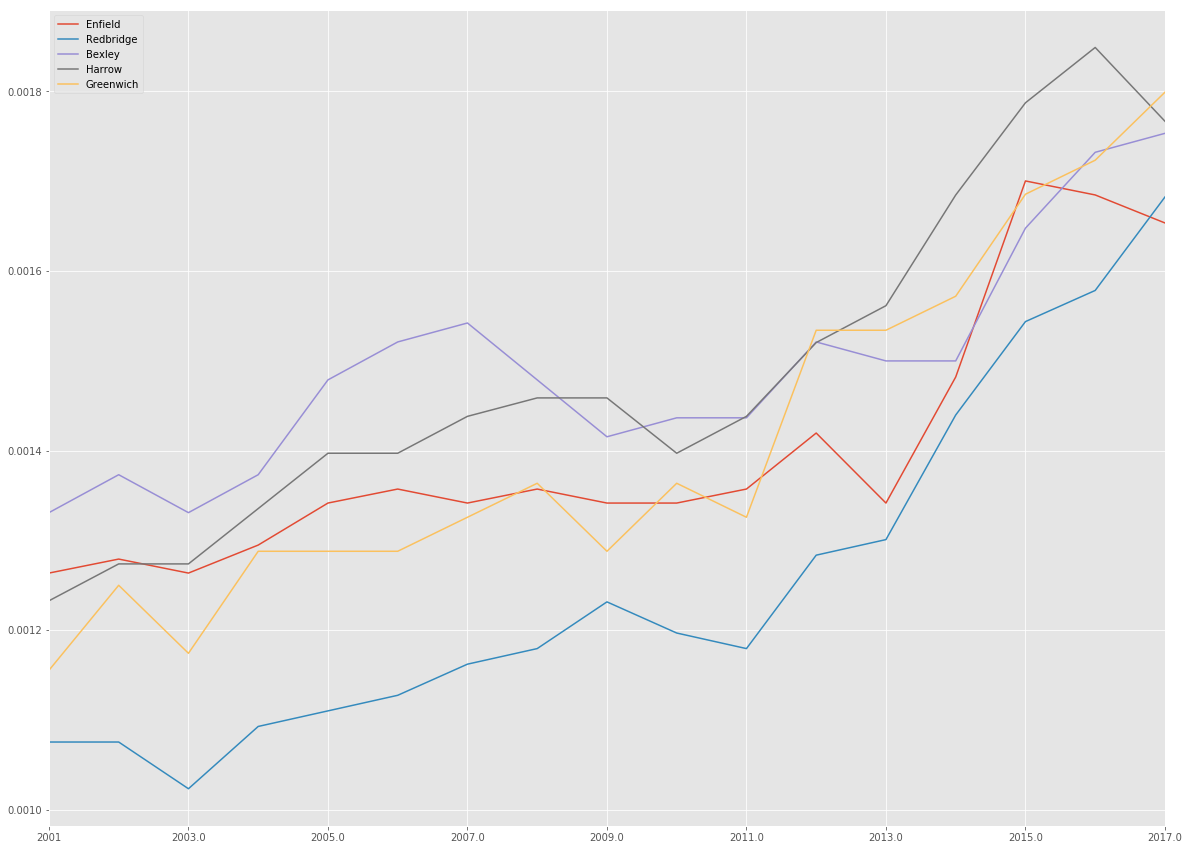

In [77]:
plt.figure(figsize=(20,15))
S1.plot.line()
S2.plot.line()
S3.plot.line()
S4.plot.line()
S5.plot.line()
plt.gca().legend(('Enfield','Redbridge','Bexley','Harrow','Greenwich'))

# The plot reveals important things 
## In Harrow and Enfield the density of Restaurants is decreasing which in other words means that Businesses are closing , so it's a not so attractive place to put  business in
## Bexley is reaching a stable point and also is pretty inestable, take a look  in the fall in the period between 2007 and 2009 and then the stagnation period between 2012 an 2014.
## Lastly in  Greenwich and Redbrige  businesses are flourishing 

### It's time to choose a Borough , so in order to get the maximum revenues a new database will be used (Average  Income per Borough) 

In [78]:
Income=pd.read_excel('earnings-residence-borough.xls',sheetname='Total, weekly')

In [79]:
Income1=Income[(Income['Area']=='Greenwich') |(Income['Area']=='Redbridge')|(Income['Area']=='Enfield')|(Income['Area']=='Bexley')|(Income['Area']=='Harrow')]

In [80]:
Income2=Income1[['Area',2018]]

In [81]:
Income2.sort_values(2018,ascending=False).reset_index(drop=True)

Area   2018
0  Greenwich  573.7
1  Redbridge  554.7
2     Harrow  538.3
3     Bexley  513.8
4    Enfield  479.1

# In conclussion with a simple approach ( Without considering rent costs , and number of similar restaurants in a Borough), the place in which you'll get the highest revenue will be Greenwich

In [82]:
CLIENT_ID = 'GOKZYNKNJKO5B3L1KAPTNGPKGZ3JC5TJJTX4KKRIN2X3UADH' # your Foursquare ID
CLIENT_SECRET = 'GRV0QCAP5VUXEK3HA5ZKRHZERQ3XWJWXR5LXRUCYIB2CXXQ0' # your Foursquare Secret
VERSION = '20180605' 


In [83]:
A5[A5['Borough']=='Greenwich'].index

Int64Index([10], dtype='int64')

In [84]:
NLAT = A6.loc[10,'Latitude'] # neighborhood latitude value
NLOT = A6.loc[10,'Longitude'] # neighborhood longitude value
NName =A5.loc[10 ,'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(NName, 
                                                               NLAT, 
                                                               NLOT))


Latitude and longitude values of Greenwich are 51.4892, 0.0648.


In [85]:
LIMIT = 3000
radius = 3000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, NLAT, NLOT, VERSION, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?client_id=GOKZYNKNJKO5B3L1KAPTNGPKGZ3JC5TJJTX4KKRIN2X3UADH&client_secret=GRV0QCAP5VUXEK3HA5ZKRHZERQ3XWJWXR5LXRUCYIB2CXXQ0&ll=51.4892,0.0648&v=20180605&radius=3000&limit=3000'

In [87]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cef1e59db04f52f5f57bcb4'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-562915e7498e006e2fd4be42-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d11b941735',
         'name': 'Pub',
         'pluralName': 'Pubs',
         'primary': True,
         'shortName': 'Pub'}],
       'id': '562915e7498e006e2fd4be42',
       'location': {'address': '15 Major Draper St',
        'cc': 'GB',
        'city': 'Woolwich',
        'country': 'United Kingdom',
        'crossStreet': 'The Royal Arsenal',
        'distance': 569,
        'formattedAddress': ['15 Major Draper St (The Royal Arsenal)',
         'Woolwich',
         'Greater London',
         'SE18 6SW',
      

In [88]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [100]:
venues = results['response']['groups'][0]['items']
    
nearby_venues1 = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


name      categories        lat       lng
0         The Taproom SE18             Pub  51.492198  0.071456
1             M&S Foodhall   Grocery Store  51.493041  0.069766
2  Royal Arsenal Riverside  Scenic Lookout  51.494540  0.072122
3            Royal Arsenal  History Museum  51.494544  0.072136
4       Woolwich Equitable             Bar  51.490076  0.068131

In [90]:
nearby_venues['categories'].unique()

array(['Pub', 'Grocery Store', 'Scenic Lookout', 'History Museum', 'Bar',
       'Asian Restaurant', 'Clothing Store', 'Italian Restaurant',
       'Breakfast Spot', 'Café', 'Gym / Fitness Center',
       'Furniture / Home Store', 'Bakery', 'Coffee Shop', 'Gastropub',
       'Forest', 'Park', 'Go Kart Track', 'Vietnamese Restaurant',
       'Theater', 'Hotel', 'Plaza', 'Historic Site', 'African Restaurant',
       'Castle', 'Pool', 'Thai Restaurant', 'Chinese Restaurant',
       'Airport', 'Rafting', 'Supermarket', 'Gym', 'Fast Food Restaurant',
       'Pizza Place', 'Sandwich Place', 'Pharmacy', 'Bookstore',
       'American Restaurant', 'Warehouse Store', 'Convenience Store',
       'Soccer Stadium', 'Flea Market', 'Hotel Bar', 'Garden Center',
       'Restaurant', 'Paintball Field', 'Electronics Store',
       'Shopping Plaza', 'Discount Store', 'Golf Course', 'Auto Garage',
       'Indian Restaurant'], dtype=object)

In [91]:
nearby_venues.shape

(100, 4)

In [94]:
def gNV(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        venues=results['response']['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venues])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
TVenues = gNV(names=A6['Borough'],
                                   latitudes=A6['Latitude'],
                                   longitudes=A6['Longitude']
                                  )

In [101]:
RESTAR=TVenues[(TVenues['Borough']=='Greenwich')|(TVenues['Borough']=='Harrow')|(TVenues['Borough']=='Bexley')|(TVenues['Borough']=='Enfield')|(TVenues['Borough']=='Redbridge')]

In [106]:
RESTAR1=RESTAR[RESTAR['Venue Category'].str.contains("Restaurant")|RESTAR['Venue Category'].str.contains("Sandwich")|RESTAR['Venue Category'].str.contains("Coffee")]

In [116]:
RESTAR2=RESTAR1[['Venue Category','Borough']].groupby('Venue Category').count()

In [117]:
RESTAR2

Borough
Venue Category                    
African Restaurant               1
American Restaurant              3
Asian Restaurant                 1
Chinese Restaurant               4
Coffee Shop                     27
English Restaurant               2
Fast Food Restaurant            15
French Restaurant                1
Greek Restaurant                 1
Indian Restaurant               17
Italian Restaurant               9
Mediterranean Restaurant         3
Mexican Restaurant               1
Middle Eastern Restaurant        1
Portuguese Restaurant            7
Restaurant                       1
Sandwich Place                  11
Thai Restaurant                  2
Turkish Restaurant               5
Vietnamese Restaurant            1

## As the number of restaurant returned by foursquare APi doesn't match with the number of places from the database , Foursquare results unefficient for our analysis
